In [89]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
from datetime import datetime
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize
import sns

In [81]:
matplotlib.rcParams['figure.figsize'] = (8,6)

In [93]:
def my_loss_fn2(ytruetest, ytruetrain, ypredtest, ypredtrain):
    loss = np.array([[0,1,2],[1,0,1],[2,1,0]])
    days = len(ytruetest)
    losstrain = np.zeros(days)
    losstest = np.zeros(days)
    acctrain = np.zeros(days)
    acctest = np.zeros(days)
    acctrain1 = np.zeros(days)
    acctest1 = np.zeros(days)
    
    for i in range(days):
        conftrain = confusion_matrix(ytruetrain[i], ypredtrain[i])
        acctrain[i] = (conftrain[0,0] + conftrain[2,2])/np.sum(conftrain[0] + conftrain[2])
        acctrain1[i] = (conftrain[0,0] + conftrain[2,2])/np.sum(
            conftrain[0,0] + conftrain[0,2] + conftrain[2,0] + conftrain[2,2])
        losstrain[i] = np.sum(conftrain * loss)
        
        conftest = confusion_matrix(ytruetest[i], ypredtest[i])
        acctest[i] = ((conftest[0,0] + conftest[2,2])/
                      np.sum(conftest[0] + conftest[2]))
        acctest1[i] = (conftest[0,0] + conftest[2,2])/np.sum(
            conftest[0,0] + conftest[0,2] + conftest[2,0] + conftest[2,2])
        losstest[i] = np.sum(conftest * loss)
    
    ind = [('Day ' + str(i+1))for i in range(days)]
    col = ['Loss Train','Loss Test','Accuracy Train 1',
           'Accuracy Train 2','Accuracy Test 1',
           'Accuracy Test 2']
    retv = zip(col,(losstrain, losstest, acctrain, acctrain1, acctest, acctest1))
    return pd.DataFrame(dict(retv),index=ind)

In [92]:
def my_loss_fn(ytruetest, ytruetrain, ypredtest, ypredtrain):
    loss = np.array([[0,1,2],[1,0,1],[2,1,0]])
    days = len(ytruetest)
    losstrain = np.zeros(days)
    losstest = np.zeros(days)
    acctrain = np.zeros(days)
    acctest = np.zeros(days)
    acctrain1 = np.zeros(days)
    acctest1 = np.zeros(days)
    
    for i in range(days):
        conftrain = confusion_matrix(ytruetrain[i], ypredtrain[i])
        acctrain[i] = (conftrain[0,0] + conftrain[2,2])/np.sum(conftrain[0] + conftrain[2])
        acctrain1[i] = (conftrain[0,0] + conftrain[2,2])/np.sum(
            conftrain[0,0] + conftrain[0,2] + conftrain[2,0] + conftrain[2,2])
        losstrain[i] = np.sum(conftrain * loss)
        
        conftest = confusion_matrix(ytruetest[i], ypredtest[i])
        acctest[i] = ((conftest[0,0] + conftest[2,2])/
                      np.sum(conftest[0] + conftest[2]))
        acctest1[i] = (conftest[0,0] + conftest[2,2])/np.sum(
            conftest[0,0] + conftest[0,2] + conftest[2,0] + conftest[2,2])
        losstest[i] = np.sum(conftest * loss)
    
    
    ind = [('Day ' + str(i+1))for i in range(days)]
    col = ['Loss Train','Loss Test','Accuracy Train 1',
           'Accuracy Train 2','Accuracy Test 1',
           'Accuracy Test 2']
    
    plt.plot(ind, losstrain, label='loss train')
    plt.plot(ind, losstest, label='loss test')
    plt.legend()
    plt.show()
    
    plt.plot(ind, acctrain, label='accuracy train')
    plt.plot(ind, acctest, label='accuracy test')
    plt.legend()
    plt.show()
    
    plt.plot(ind, acctrain1, label='accuracy1 train')
    plt.plot(ind, acctest1, label='accuracy1 test')
    plt.legend()
    plt.show()
    
    retv = zip(col,(losstrain, losstest, acctrain, acctrain1, acctest, acctest1))
    retdf = pd.DataFrame(dict(retv),index=ind)
    
    avedf = pd.DataFrame(retdf.mean())
    avedf.columns = ['Averages']
    
    lossdf = retdf.iloc[:,0:2]
    accudf = retdf.iloc[:,[2,4]]
    accudf1 = retdf.iloc[:,[3,5]]
    
    ax1 = sns.heatmap(lossdf)
    ax1.set_title('heatmap for loss function')
    plt.show()
    ax2 = sns.heatmap(accudf)
    ax2.set_title('heatmap for accuracy1')
    plt.show()
    ax3 = sns.heatmap(accudf1)
    ax3.set_title('heatmap for accuracy2')
    plt.show()

    return (retdf.round(2), avedf.round(2))

# Loading in Data

In [2]:
DF = pd.read_csv('ESH2019_final.csv',
                 index_col = 0,
                 dtype={'Time':str})

D:\Programs\Anaconda\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
DF.head()

,Date,msecs,Time,Bid Price,Bid Size,Ask Price,Ask Size,Mid,dM,M_10ma,...,OI,OI_a1,OI_a2,OI_a3,OI_a4,OI_a5,OI_5ma,OI_10ma,OI_20ma,OI Ratio
0,01/02/2019,28800000.0,07:59:59.757,2467.50,9.0,2467.75,36.0,2467.625,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.600000
1,01/02/2019,28800500.0,08:00:00.305,2467.25,36.0,2467.50,19.0,2467.375,-0.25,NaN,...,-19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.309091
2,01/02/2019,28801000.0,08:00:00.826,2467.25,42.0,2467.50,3.0,2467.375,0.00,NaN,...,22.0,-19.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.866667
3,01/02/2019,28801500.0,08:00:01.349,2467.25,29.0,2467.50,30.0,2467.375,0.00,NaN,...,-40.0,22.0,-19.0,NaN,NaN,NaN,NaN,NaN,NaN,-0.016949
4,01/02/2019,28802000.0,08:00:01.761,2467.25,42.0,2467.50,22.0,2467.375,0.00,NaN,...,21.0,-40.0,22.0,-19.0,NaN,NaN,NaN,NaN,NaN,0.312500


In [4]:
DF.loc[:,'Time'] = DF.loc[:,'Time'].replace(np.nan,'',regex=True)

# Exploration

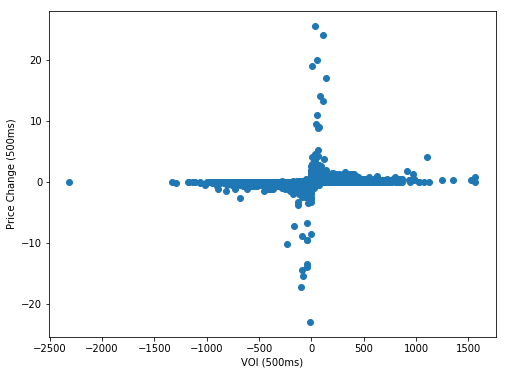

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(DF['OI'],DF['dM'])
plt.xlabel("VOI (500ms)")
plt.ylabel("Price Change (500ms)")
plt.show()

In [6]:
DF[['OI','dM']].corr()

,OI,dM
OI,1.000000,0.361549
dM,0.361549,1.000000


# SVM

In [7]:
# defining which features to use

x_labs = ['OI_a1', 'OI_a2', 'OI_a3', 'OI_a4', 'OI_a5',
          'OI Ratio','OI_10ma','OI_20ma'] # covars
y_labs = ['signal6']

In [8]:
def my_confusion_matrix(ytrue,ypred,labs=[1,0,-1]):
    from sklearn.metrics import confusion_matrix
    cols = ['Buy (p)','Hold (p)','Sell (p)']
    ind = ['Buy (t)','Hold (t)','Sell (t)']
    mat = confusion_matrix(ytrue,ypred,labs)
    return pd.DataFrame(mat, columns=cols,index=ind)

## Cross Validation

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

# trading loss for our own CV
def trading_loss(ytrue,ypred):
    conftrain = confusion_matrix(ytrue, ypred)
    loss = np.array([[0,1,2],[1,0,1],[2,1,0]])
    return np.sum(conftrain * loss)

# callable to score for CV
trade_scorer=make_scorer(trading_loss,greater_is_better=False)

### Extracting the train/test indexes

In [28]:
def my_train_test_idx(DF,xlabs=x_labs,ylabs=['signal6'],return_df=False,n_days=4):
    '''
    input your data frame and which x's you want to use
        as a list into xlabs
        
    return_df to return new data frame for CV
    return value is list of 2-tuples of train & test
        index iterables
        - pass directly into the cv parameter of cross_validate
    '''
    df = DF[['Date']+xlabs+ylabs].dropna()
    
    #list of lengths of each day's data
    lengths = []
    for d in np.unique(DF['Date'].values)[:n_days]:
        lengths.append(df[df['Date']==d].shape[0])
    
    # where each day starts/ends
    bounds = np.cumsum(lengths)
    
    # list of 2-tuples of train & test indexes
    train_test_idx=[]
    prev=0
    for idx,val in enumerate(bounds[:-1]):
        train_id = range(prev,val)
        test_id = range(val,bounds[idx+1])
        prev = val
        train_test_idx.append((np.array(train_id),np.array(test_id)))
    
    if return_df:
        return (train_test_idx,df)
    return (train_test_idx)

In [29]:
idxs, df_cv = my_train_test_idx(DF,x_labs,return_df=True)

In [30]:
idxs

[(array([    0,     1,     2, ..., 50378, 50379, 50380]),
  array([ 50381,  50382,  50383, ..., 100760, 100761, 100762])),
 (array([ 50381,  50382,  50383, ..., 100760, 100761, 100762]),
  array([100763, 100764, 100765, ..., 151142, 151143, 151144])),
 (array([100763, 100764, 100765, ..., 151142, 151143, 151144]),
  array([151145, 151146, 151147, ..., 201524, 201525, 201526]))]

## Testing CV and GridSearchCV

In [12]:
from sklearn.model_selection import GridSearchCV
tune_params = {'C':np.logspace(-5,5,20)}

In [31]:
fit = GridSearchCV(svm.LinearSVC(dual=False,class_weight='balanced'),
                   tune_params,scoring=trade_scorer,cv=idxs)
fit.fit(df_cv[x_labs].values,y=df_cv['signal6'].values)

GridSearchCV(cv=[(array([    0,     1, ..., 50379, 50380]), array([ 50381,  50382, ..., 100761, 100762])), (array([ 50381,  50382, ..., 100761, 100762]), array([100763, 100764, ..., 151143, 151144])), (array([100763, 100764, ..., 151143, 151144]), array([151145, 151146, ..., 201525, 201526]))],
       error_score='raise-deprecating',
       estimator=LinearSVC(C=1.0, class_weight='balanced', dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': array([1.00000e-05, 3.35982e-05, 1.12884e-04, 3.79269e-04, 1.27427e-03,
       4.28133e-03, 1.43845e-02, 4.83293e-02, 1.62378e-01, 5.45559e-01,
       1.83298e+00, 6.15848e+00, 2.06914e+01, 6.95193e+01, 2.33572e+02,
       7.84760e+02, 2.63665e+03, 8.85867e+03, 2.97635e+04, 1.00000e+05])},
       pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [32]:
best_C = fit.best_params_['C']
fit.best_params_

{'C': 1.8329807108324339}

---

In [ ]:
# figure out how to do feature importance for SVM?
'''
def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()

f_importances(sv.coef_, x_labs)
'''

---

### Prediction Time Comparison Between Estimators

In [49]:
x_labs = ['OI_a1', 'OI_a2', 'OI_a3', 'OI_a4', 'OI_a5',
          'OI Ratio','OI_10ma','OI_20ma']

def predict_time(estimators, df, fitted,xlabs=x_labs,ylab='signal6',n_iter=50,n_points = 200000):
    '''
    estimators - a list of estimators to be compared for predicting
    
    df - pandas data frame that we've been suing
    
    n_points - int: how many points to predict on for comparison
    
    return - data frame comparing prediction times for each estimator on
            n_points of data
    '''
    
    import random
    import numpy as np
    import time
    x = xlabs
    tmp_df = df[['Date'] + xlabs + [ylab]].dropna()

    if not fitted:
        d = random.choice(np.unique(tmp_df['Date'].values))
        test = tmp_df[tmp_df['Date']==d]
        X = test[x].values
        y = test[ylab].values
        for estim in estimators:
            estim.fit(X,y)
    
    times = np.zeros((len(estimators),n_iter))
    
    test_idx = np.random.randint(0,tmp_df.shape[0],size=n_points)
    X_test = tmp_df.iloc[test_idx,:][x].values
    
    for k in range(n_iter):
        for idx,estim in enumerate(estimators):
            start = time.time()
            pred = estim.predict(X_test)
            #print(pred)
            end = time.time()
            times[idx,k] = end-start
    
    columns = ['Trial ' + str(i+1) for i in range(n_iter)]
    return pd.DataFrame(times, columns = columns, index = range(1,len(estimators)+1))

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn import svm
lr = LinearRegression()
sv = svm.LinearSVC(dual = False)

test = predict_time([lr,sv],df_test,False,x_labs)

In [54]:
test

,Trial 1,Trial 2,Trial 3,Trial 4,Trial 5,Trial 6,Trial 7,Trial 8,Trial 9,Trial 10,...,Trial 41,Trial 42,Trial 43,Trial 44,Trial 45,Trial 46,Trial 47,Trial 48,Trial 49,Trial 50
1,0.002928,0.002997,0.002995,0.003992,0.003989,0.002994,0.002996,0.002995,0.002996,0.003990,...,0.003920,0.003952,0.002995,0.003956,0.003956,0.003006,0.003027,0.003027,0.002993,0.003989
2,0.010969,0.010966,0.009969,0.009972,0.009974,0.010967,0.010968,0.010967,0.009970,0.009972,...,0.010045,0.011936,0.010002,0.009009,0.009008,0.009927,0.009938,0.009938,0.009974,0.009973


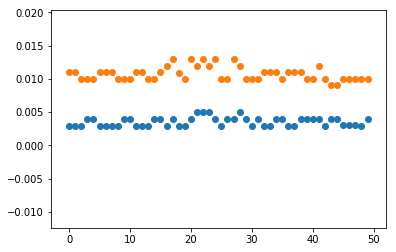

In [56]:
plt.scatter(range(50),test.iloc[0,:])
plt.scatter(range(50),test.iloc[1,:])
plt.show()

---

## Testing on Data Set

In [58]:
train_CFM  = []    # training confusion matrices
test_CFM   = []    # test confusion matrices

train_loss = []    # training loss
test_loss  = []    # test loss

y_pred_vec_tr = [] # training predictions
y_true_vec_tr = [] # true training values

y_pred_vec_te = [] # test predictions
y_true_vec_te = [] # true test predictions

svm_coefs = []     # coefficients for each fit

i_vec = my_train_test_idx(DF,x_labs,['signal6'],
                 return_df=False,
                 n_days=np.unique(DF['Date']).shape[0]
                )
test_idx = i_vec[3:]
df_test = df_cv.copy()

In [59]:
###### TESTING ON THE DATA ######
sv_fit = svm.LinearSVC(C=best_C,dual=False,class_weight='balanced')
for i,j in tqdm(test_idx):
    X_train = df_test.iloc[i,:][x_labs].values
    y_train = df_test.iloc[i,:]['signal6'].values
    X_test = df_test.iloc[j,:][x_labs].values
    y_test = df_test.iloc[j,:]['signal6'].values
    
    sv_fit.fit(X_train,y_train)
    
    # coefficients for SVM
    svm_coefs.append(sv_fit.coef_)
    
    # predictions
    p_tr = sv_fit.predict(X_train)
    p_te = sv_fit.predict(X_test)
    
    y_pred_vec_tr.append(p_tr)
    y_pred_vec_te.append(p_te)
    
    y_true_vec_tr.append(y_train)
    y_true_vec_te.append(y_test)
    
    # confusion matrices
    train_CFM.append(my_confusion_matrix(y_train,p_tr,[1,0,-1]))
    test_CFM.append(my_confusion_matrix(y_test,p_te,[1,0,-1]))
    
    # loss
    train_loss.append(trading_loss(y_train,p_tr))
    test_loss.append(trading_loss(y_test,p_te))

100%|██████████████████████████████████████████████████████████████████████████████████| 38/38 [00:31<00:00,  1.21it/s]


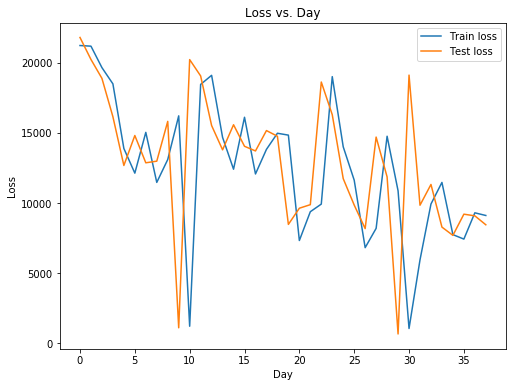

In [82]:
plt.title("Loss vs. Day")
plt.xlabel("Day")
plt.ylabel("Loss")
plt.plot(range(38),train_loss,label="Train loss")
plt.plot(range(38),test_loss,label="Test loss")
plt.legend()
plt.show()

In [83]:
my_loss_fn(y_true_vec_te,y_true_vec_tr,y_pred_vec_te,y_pred_vec_tr)

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in longlong_scalars


,Loss Train,Loss Test,Accuracy Train 1,Accuracy Train 2,Accuracy Test 1,Accuracy Test 2
Day 1,21216.0,21790.0,0.495960,0.912074,0.528981,0.904783
Day 2,21171.0,20224.0,0.498324,0.911710,0.498537,0.921454
Day 3,19643.0,18877.0,0.462420,0.924353,0.475491,0.940804
Day 4,18487.0,16148.0,0.430944,0.943610,0.493474,0.947835
Day 5,13884.0,12674.0,0.335794,0.964590,0.391166,0.971536
Day 6,12128.0,14808.0,0.317547,0.977113,0.270437,0.961876
Day 7,15032.0,12865.0,0.333272,0.958710,0.385518,0.960917
Day 8,11469.0,12981.0,0.232657,0.968558,0.234726,0.964431
Day 9,13097.0,15814.0,0.306322,0.960614,0.268187,0.963377
Day 10,16208.0,1115.0,0.358274,0.956629,0.091610,0.963964


D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in longlong_scalars


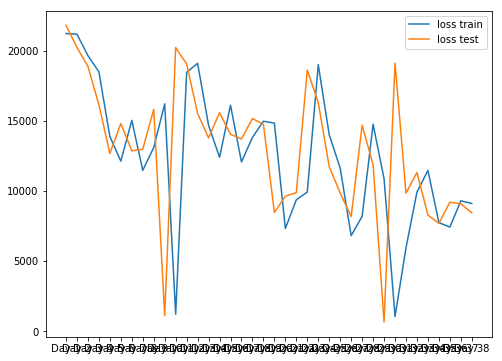

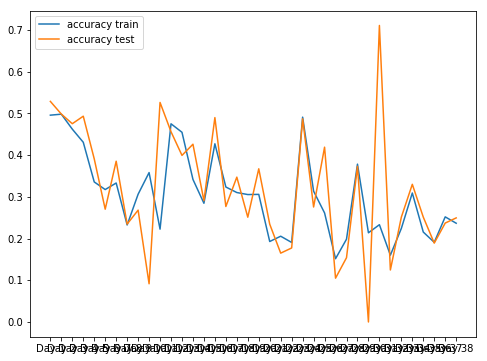

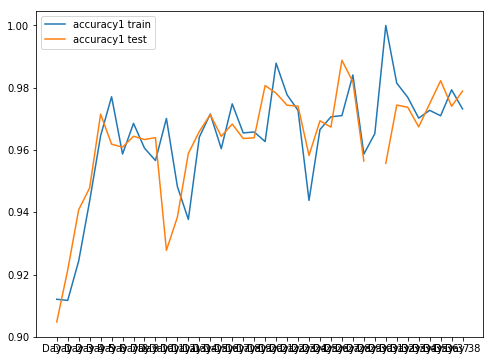

AttributeError: module 'sns' has no attribute 'heatmap'

In [91]:
a, b = my_loss_fn(y_true_vec_te,y_true_vec_tr,y_pred_vec_te,y_pred_vec_tr)
display(a,b)